Moim zadaniem jest wygenerować dwie próbki danych z rozkładu normalnego o średniej μ=3 i odchyleniu standardowym σ=1, jedna z nich powinna zawierać 100 elementów, a druga 10 000 elementów.

In [1]:
import numpy as np
mean = 3
std_dev = 1
data_100 = np.random.normal(loc=mean, scale=std_dev, size=100)
data_10000 = np.random.normal(loc=mean, scale=std_dev, size=10000)
print("Rozmiar data_100:", len(data_100))
print("Rozmiar data_10000:", len(data_10000))

Rozmiar data_100: 100
Rozmiar data_10000: 10000


Mam stworzone dwa zbiory danych: jeden zawierający 100 elementów (data_100), a drugi 10 000 elementów (data_10000).
Rysuje histogram dla tych dwóch zestawów :

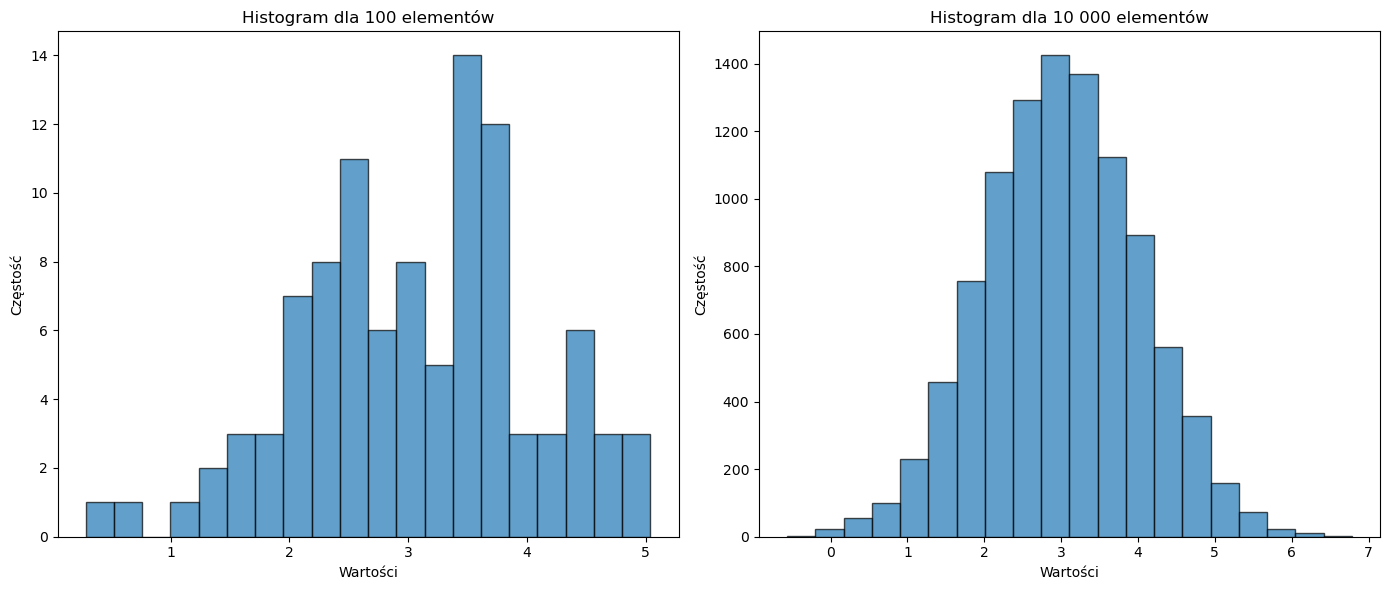

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(data_100, bins=20, edgecolor='black', alpha=0.7)
plt.title("Histogram dla 100 elementów")
plt.xlabel("Wartości")
plt.ylabel("Częstość")

plt.subplot(1, 2, 2)
plt.hist(data_10000, bins=20, edgecolor='black', alpha=0.7)
plt.title("Histogram dla 10 000 elementów")
plt.xlabel("Wartości")
plt.ylabel("Częstość")

plt.tight_layout()
plt.show()

        Wnioski: 1)Histogram dla 100 elementów :rozkład jest mniej gładki, z wyraźnymi fluktuacjami. Widać nieregularności wynikające z małej liczby próbek, co prowadzi do większej losowości. Pomimo mniejszej próby, wartości wciąż koncentrują się wokół średniej 3, co świadczy o tym, że próbka w przybliżeniu oddaje charakter rozkładu normalnego.2)Histogram dla 10 000 elementów: rozkład jest znacznie gładszy i bardziej symetryczny, co jest typowe dla rozkładu normalnego przy dużej liczbie próbek. Większa liczba danych pozwala na lepsze odwzorowanie teoretycznej gęstości rozkładu normalnego z wyraźnym „dzwonem” wokół wartości 3.

Obliczam średnią dla obu zestawów danych. Średnia wskaże nam , gdzie znajduje się centralna tendencja każdego zbioru ( powinna być blisko wartości 3, ponieważ wygenerowaliśmy dane z rozkładu normalnego o średniej μ=3).

In [5]:
mean_100 = np.mean(data_100)
mean_10000 = np.mean(data_10000)
print("Średnia dla 100 elementów:", mean_100)
print("Średnia dla 10 000 elementów:", mean_10000)

Średnia dla 100 elementów: 3.0627756604895437
Średnia dla 10 000 elementów: 3.004831197025916


        Wynik potwierdza, że dane zostały wygenerowane prawidłowo zgodnie z rozkładem normalnym o oczekiwanej wartości 3.
        
Wyznaczam mediany dla obu zbiorów:

In [7]:
median_100 = np.median(data_100)
median_10000 = np.median(data_10000)
print("Mediana dla 100 elementów:", median_100)
print("Mediana dla 10 000 elementów:", median_10000)

Mediana dla 100 elementów: 3.0571849012789007
Mediana dla 10 000 elementów: 3.002435903206005


        Oznacza to, że rozkład danych jest symetryczny wokół wartości centralnej, co jest zgodne z charakterystyką rozkładu normalnego.

Wyznaczam wartość modalną(moda), jednak jej wartość nie jest tak łatwa do zdefiniowania, ponieważ dane z rozkładu normalnego są ciągłe i teoretycznie mogą przyjmować nieskończoną liczbę wartości...jednak mamy do czynienia z danymi losowo wygenerowanymi i możemy przybliżyć modę, wyznaczając wartość w której gęstość danych jest najwyższa(szukam przedziału o najwyższej liczbie obserwacji). Używam histogramu aby  znaleźć środek przedziału:

In [13]:
def approximate_mode(data, bins=30):
    counts, bin_edges = np.histogram(data, bins=bins)
    max_bin_index = np.argmax(counts)  
    mode = (bin_edges[max_bin_index] + bin_edges[max_bin_index + 1]) / 2  
    return mode

mode_100 = approximate_mode(data_100, bins=30)
mode_10000 = approximate_mode(data_10000, bins=30)

print("Przybliżona moda dla 100 elementów:", mode_100)
print("Przybliżona moda dla 10 000 elementów:", mode_10000)

Przybliżona moda dla 100 elementów: 3.6932688282671213
Przybliżona moda dla 10 000 elementów: 2.985352206889422


        Oznacza to iż przy większej liczbie danych, przybliżona moda lepiej odwzorowuje punkt centralny rozkładu normalnego, co jest zgodne z teorią. Możemy zauważyć, że moda dla dużego zbioru jest bardziej reprezentatywna niż dla mniejszego.

Dodaje teraz do obu histogramów linie pokazujące średnią, medianę oraz przybliżoną modę, aby lepiej zobrazować miary centralne.

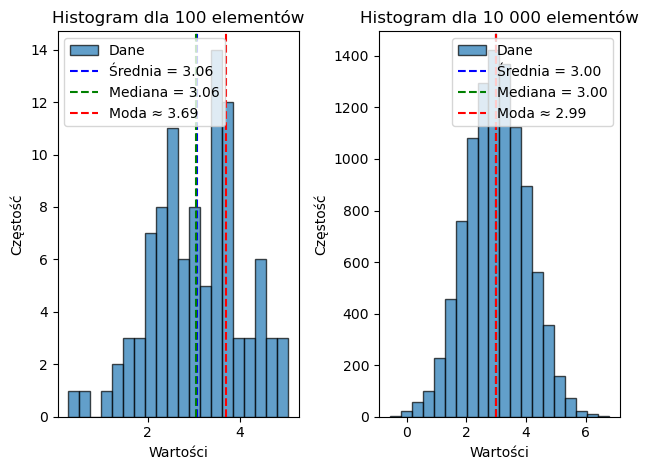

In [15]:
plt.subplot(1, 2, 1)
plt.hist(data_100, bins=20, edgecolor='black', alpha=0.7, label="Dane")
plt.axvline(mean_100, color='blue', linestyle='dashed', linewidth=1.5, label=f"Średnia = {mean_100:.2f}")
plt.axvline(median_100, color='green', linestyle='dashed', linewidth=1.5, label=f"Mediana = {median_100:.2f}")
plt.axvline(mode_100, color='red', linestyle='dashed', linewidth=1.5, label=f"Moda ≈ {mode_100:.2f}")
plt.title("Histogram dla 100 elementów")
plt.xlabel("Wartości")
plt.ylabel("Częstość")
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(data_10000, bins=20, edgecolor='black', alpha=0.7, label="Dane")
plt.axvline(mean_10000, color='blue', linestyle='dashed', linewidth=1.5, label=f"Średnia = {mean_10000:.2f}")
plt.axvline(median_10000, color='green', linestyle='dashed', linewidth=1.5, label=f"Mediana = {median_10000:.2f}")
plt.axvline(mode_10000, color='red', linestyle='dashed', linewidth=1.5, label=f"Moda ≈ {mode_10000:.2f}")
plt.title("Histogram dla 10 000 elementów")
plt.xlabel("Wartości")
plt.ylabel("Częstość")
plt.legend()

plt.tight_layout()
plt.show()

        Wnioski- Mniejsza próbka (100 elementów): centralne miary są bliskie siebie, ale występują pewne odchylenia (szczególnie dla mody), co jest normalne dla mniejszych prób. Większa próbka (10 000 elementów): wszystkie miary centralne (średnia, mediana, moda) są bardzo zbliżone do siebie i do wartości teoretycznej, co świadczy o lepszym odwzorowaniu rozkładu normalnego.

Wyznaczam kwartyle za pomocą funkcji np.percentile dla obu zbiorów danych :

In [19]:
q1_100 = np.percentile(data_100, 25)  
q2_100 = np.percentile(data_100, 50)  
q3_100 = np.percentile(data_100, 75) 

q1_10000 = np.percentile(data_10000, 25)
q2_10000 = np.percentile(data_10000, 50)
q3_10000 = np.percentile(data_10000, 75)

print("Kwartyle dla 100 elementów:")
print(f"Q1 (25%): {q1_100}")
print(f"Q2 (Mediana, 50%): {q2_100}")
print(f"Q3 (75%): {q3_100}")

print("\nKwartyle dla 10 000 elementów:")
print(f"Q1 (25%): {q1_10000}")
print(f"Q2 (Mediana, 50%): {q2_10000}")
print(f"Q3 (75%): {q3_10000}")

Kwartyle dla 100 elementów:
Q1 (25%): 2.4072329827980443
Q2 (Mediana, 50%): 3.0571849012789007
Q3 (75%): 3.6805014942841447

Kwartyle dla 10 000 elementów:
Q1 (25%): 2.3141693091857434
Q2 (Mediana, 50%): 3.002435903206005
Q3 (75%): 3.695508170220251


        Wnioski- 1)Kwartyle dla 100 elementów: kwartyle są stosunkowo blisko oczekiwanej wartości centralnej (średnia ≈ 3), ale widać niewielką asymetrię wynikającą z mniejszej próby. Rozpiętość pomiędzy Q1 i Q2 jest nieco większa niż pomiędzy Q2 i Q3, co może wskazywać na nieznaczne przesunięcie rozkładu.2)Kwartyle dla 10 000 elementów:wartości są symetrycznie rozłożone wokół mediany i są bardziej zbliżone do teoretycznych wartości rozkładu normalnego o średniej 3. Większa liczba danych lepiej odwzorowuje rozkład normalny i zapewnia bardziej precyzyjne wartości kwartylowe.

Dodaje średnią, medianę, modę oraz kwartyle do histogramów:

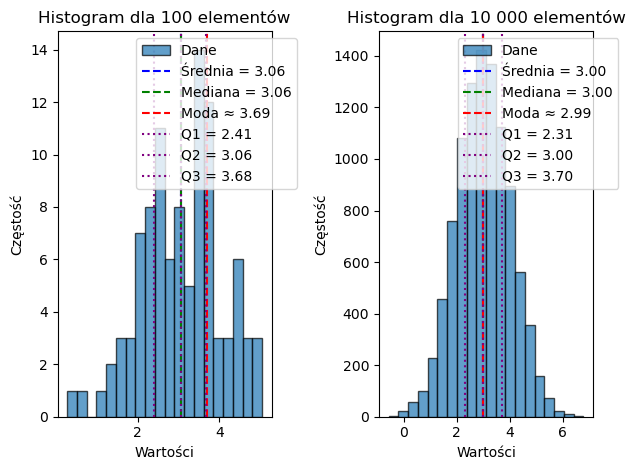

In [21]:
plt.subplot(1, 2, 1)
plt.hist(data_100, bins=20, edgecolor='black', alpha=0.7, label="Dane")
plt.axvline(mean_100, color='blue', linestyle='dashed', linewidth=1.5, label=f"Średnia = {mean_100:.2f}")
plt.axvline(median_100, color='green', linestyle='dashed', linewidth=1.5, label=f"Mediana = {median_100:.2f}")
plt.axvline(mode_100, color='red', linestyle='dashed', linewidth=1.5, label=f"Moda ≈ {mode_100:.2f}")
plt.axvline(q1_100, color='purple', linestyle='dotted', linewidth=1.5, label=f"Q1 = {q1_100:.2f}")
plt.axvline(q2_100, color='purple', linestyle='dotted', linewidth=1.5, label=f"Q2 = {q2_100:.2f}")
plt.axvline(q3_100, color='purple', linestyle='dotted', linewidth=1.5, label=f"Q3 = {q3_100:.2f}")
plt.title("Histogram dla 100 elementów")
plt.xlabel("Wartości")
plt.ylabel("Częstość")
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

plt.subplot(1, 2, 2)
plt.hist(data_10000, bins=20, edgecolor='black', alpha=0.7, label="Dane")
plt.axvline(mean_10000, color='blue', linestyle='dashed', linewidth=1.5, label=f"Średnia = {mean_10000:.2f}")
plt.axvline(median_10000, color='green', linestyle='dashed', linewidth=1.5, label=f"Mediana = {median_10000:.2f}")
plt.axvline(mode_10000, color='red', linestyle='dashed', linewidth=1.5, label=f"Moda ≈ {mode_10000:.2f}")
plt.axvline(q1_10000, color='purple', linestyle='dotted', linewidth=1.5, label=f"Q1 = {q1_10000:.2f}")
plt.axvline(q2_10000, color='purple', linestyle='dotted', linewidth=1.5, label=f"Q2 = {q2_10000:.2f}")
plt.axvline(q3_10000, color='purple', linestyle='dotted', linewidth=1.5, label=f"Q3 = {q3_10000:.2f}")
plt.title("Histogram dla 10 000 elementów")
plt.xlabel("Wartości")
plt.ylabel("Częstość")
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

plt.tight_layout()
plt.show()

        Wnioski : Większy zbiór danych (10 000 elementów) lepiej odwzorowuje rozkład normalny, a wszystkie miary centralne oraz kwartyle są niemal idealnie symetryczne. Mniejszy zbiór (100 elementów) również zachowuje charakterystykę rozkładu normalnego, choć z większymi odchyleniami, co jest efektem mniejszej liczby próbek.

Wyznaczam teraz zakres, który pozwoli określić rozpiętość wartości w zbiorze danych, co może być przydatne do zrozumienia, jak szeroko rozkładają się dane wokół wartości centralnej.

In [23]:
range_100 = np.max(data_100) - np.min(data_100)
range_10000 = np.max(data_10000) - np.min(data_10000)
print("Zakres dla 100 elementów:", range_100)
print("Zakres dla 10 000 elementów:", range_10000)

Zakres dla 100 elementów: 4.757136686221305
Zakres dla 10 000 elementów: 7.348380279784447


        Można zobaczyć, że większy zakres dla zbioru 10 000 elementów pokazuje, że w miarę zwiększania liczby próbek rozkład normalny obejmuje szerszy zakres wartości, lepiej odzwierciedlając jego teoretyczne granice.

Wyznaczam rozstęp międzykwartylowy który pokaże,jak rozproszone są wartości w centralnej części rozkładu (od Q1 do Q3). 

In [27]:
iqr_100 = q3_100 - q1_100
iqr_10000 = q3_10000 - q1_10000
print("Rozstęp międzykwartylowy dla 100 elementów:", iqr_100)
print("Rozstęp międzykwartylowy dla 10 000 elementów:", iqr_10000)

Rozstęp międzykwartylowy dla 100 elementów: 1.2732685114861004
Rozstęp międzykwartylowy dla 10 000 elementów: 1.3813388610345076


        Wniosek: większy zbiór danych (10 000 elementów) daje bardziej reprezentatywny i stabilny rozstęp międzykwartylowy, który lepiej oddaje teoretyczną wartość rozkładu normalnego. Dla mniejszego zbioru (100 elementów) rozstęp międzykwartylowy jest zbliżony, ale występują drobne różnice wynikające z losowości.

Wyznaczam wariancję dla obu zbiorów danych. Wariancja mierzy średnią wartość kwadratów odchyleń od średniej, co pozwala zrozumieć, jak bardzo wartości w zbiorze są rozproszone wokół średniej.

In [29]:
variance_100 = np.var(data_100)
variance_10000 = np.var(data_10000)
print("Wariancja dla 100 elementów:", variance_100)
print("Wariancja dla 10 000 elementów:", variance_10000)

Wariancja dla 100 elementów: 0.9115406278724815
Wariancja dla 10 000 elementów: 1.0288929288400352


        Wniosek: Większy zbiór danych (10 000 elementów) daje bardziej stabilną i reprezentatywną wartość wariancji, bliską teoretycznej wartości. Mniejszy zbiór (100 elementów) jest również bliski wartości 1, ale występują w nim większe odchylenia, co jest naturalne przy mniejszej próbie.

Obliczam odchylenie standardowe dla obu zbiorów. W przypadku rozkładu normalnego z teoretycznym odchyleniem standardowym wynoszącym 1, wartości te powinny być zbliżone do 1.

In [32]:
std_dev_100 = np.std(data_100)
std_dev_10000 = np.std(data_10000)
print("Odchylenie standardowe dla 100 elementów:", std_dev_100)
print("Odchylenie standardowe dla 10 000 elementów:", std_dev_10000)

Odchylenie standardowe dla 100 elementów: 0.9547463683473645
Odchylenie standardowe dla 10 000 elementów: 1.0143435950603894


        Wniosek: Większy zbiór danych (10 000 elementów) daje bardziej precyzyjną wartość odchylenia standardowego, która jest bardzo bliska teoretycznej wartości 1. Dla mniejszego zbioru (100 elementów) odchylenie standardowe również jest bliskie tej wartości, ale występują pewne odchylenia spowodowane mniejszą liczbą próbek.

Wyznaczam wykres pudełkowy dla obu zbiorów. Taki wykres jest szczególnie przydatny, aby porównać oba zbiory w kontekście ich rozproszenia i symetrii.

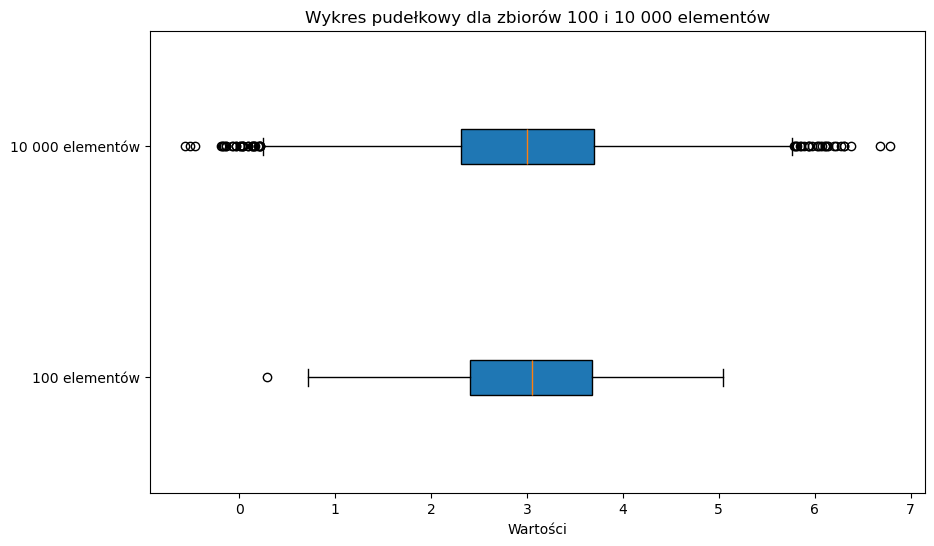

In [34]:
plt.figure(figsize=(10, 6))
plt.boxplot([data_100, data_10000], vert=False, patch_artist=True, labels=["100 elementów", "10 000 elementów"])
plt.title("Wykres pudełkowy dla zbiorów 100 i 10 000 elementów")
plt.xlabel("Wartości")
plt.show()

    Wnioski:
1)Zbiór 100 elementów:Pudełko reprezentujące rozstęp międzykwartylowy (IQR) jest stosunkowo zwarte, co wskazuje, że większość danych jest skupiona wokół mediany.
Widoczne są pojedyncze wartości odstające poniżej głównego rozkładu, które znajdują się poza zakresem wąsów wykresu.
Wykres pokazuje symetryczny rozkład wokół mediany, ale ze względu na mniejszą liczbę danych wartości odstające mogą być bardziej zauważalne.
2)Zbiór 10 000 elementów:Pudełko jest nieco szersze niż w przypadku 100 elementów, co pokazuje, że rozstęp międzykwartylowy obejmuje większy zakres wartości, co jest zgodne z większym rozmiarem próby.
Na wykresie widać więcej wartości odstających, zarówno poniżej, jak i powyżej głównego rozkładu. To naturalne w przypadku większej liczby danych, ponieważ wzrasta prawdopodobieństwo pojawienia się skrajnych wartości.
Rozkład jest wyraźnie symetryczny, z pudełkiem i wąsami równomiernie rozłożonymi wokół mediany, co dobrze odzwierciedla cechy rozkładu normalnego.

Wyznaczam współczynnik asymetrii (skosności) dla obu zbiorów danych. Współczynnik asymetrii pozwala nam określić, czy rozkład danych jest symetryczny wokół średniej, czy też ma tendencję do przechylenia w jedną stronę. W przypadku rozkładu normalnego, współczynnik asymetrii powinien wynosić około 0.

In [36]:
from scipy.stats import skew
skewness_100 = skew(data_100)
skewness_10000 = skew(data_10000)
print("Współczynnik asymetrii dla 100 elementów:", skewness_100)
print("Współczynnik asymetrii dla 10 000 elementów:", skewness_10000)

Współczynnik asymetrii dla 100 elementów: -0.22954407525119136
Współczynnik asymetrii dla 10 000 elementów: 0.017135174558158422


        Wniosek: większy zbiór danych (10 000 elementów) wykazuje prawie idealną symetrię, co jest zgodne z teoretycznym rozkładem normalnym. Mniejszy zbiór (100 elementów) ma lekką asymetrię w lewo, co może być wynikiem losowych fluktuacji w mniejszej próbie.

Stosuje metodę standaryzacji, która przekształci dane tak, aby miały średnią równą 0 i odchylenie standardowe równe 1.

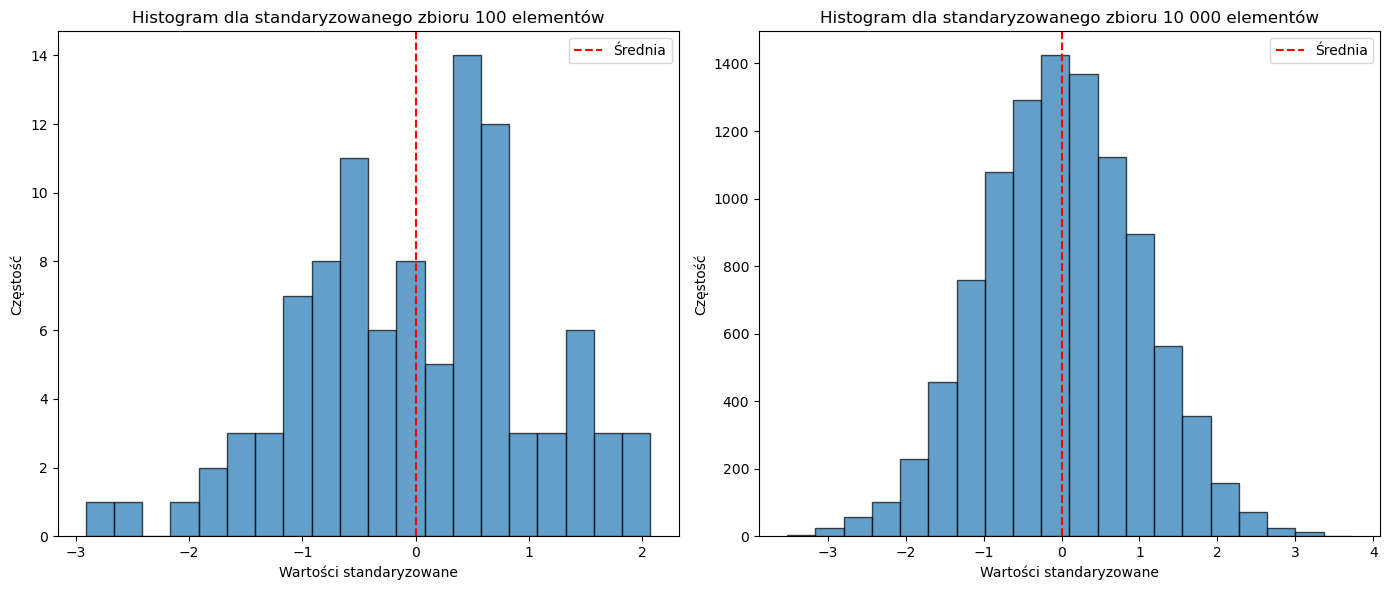

Statystyki dla standaryzowanego zbioru 100 elementów:
Średnia: -0.00
Odchylenie standardowe: 1.01

Statystyki dla standaryzowanego zbioru 10 000 elementów:
Średnia: 0.00
Odchylenie standardowe: 1.00


In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_100_standardized = scaler.fit_transform(np.array(data_100).reshape(-1, 1))
data_10000_standardized = scaler.fit_transform(np.array(data_10000).reshape(-1, 1))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(data_100_standardized, bins=20, edgecolor='black', alpha=0.7)
plt.axvline(x=data_100_standardized.mean(), color='red', linestyle='dashed', linewidth=1.5, label='Średnia')
plt.title("Histogram dla standaryzowanego zbioru 100 elementów")
plt.xlabel("Wartości standaryzowane")
plt.ylabel("Częstość")
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(data_10000_standardized, bins=20, edgecolor='black', alpha=0.7)
plt.axvline(x=data_10000_standardized.mean(), color='red', linestyle='dashed', linewidth=1.5, label='Średnia')
plt.title("Histogram dla standaryzowanego zbioru 10 000 elementów")
plt.xlabel("Wartości standaryzowane")
plt.ylabel("Częstość")
plt.legend()

plt.tight_layout()
plt.show()

print("Statystyki dla standaryzowanego zbioru 100 elementów:")
print(f"Średnia: {data_100_standardized.mean():.2f}")
print(f"Odchylenie standardowe: {np.std(data_100_standardized, ddof=1):.2f}")

print("\nStatystyki dla standaryzowanego zbioru 10 000 elementów:")
print(f"Średnia: {data_10000_standardized.mean():.2f}")
print(f"Odchylenie standardowe: {np.std(data_10000_standardized, ddof=1):.2f}")

        Wnioski -wyniki potwierdzają, że standaryzacja została wykonana poprawnie:
1) Standaryzowany zbiór 100 elementów: średnia jest bardzo bliska 0 (−0.00), co oznacza, że dane zostały poprawnie przesunięte wokół punktu centralnego.
Odchylenie standardowe wynosi 1.01, co jest bardzo bliskie oczekiwanej wartości 1. Drobne odchylenie wynika z losowego rozkładu mniejszej liczby próbek.2) Standaryzowany zbiór 10 000 elementów: średnia to dokładnie 0.00, co potwierdza doskonałe przesunięcie danych wokół wartości centralnej.
Odchylenie standardowe wynosi 1.00, co jest zgodne z założeniem, że po standaryzacji dane powinny mieć odchylenie standardowe równe 1. Dzięki dużej liczbie elementów standaryzacja działa tutaj bardzo precyzyjnie.


Dla tych dwóch zbiorów danych nie rysuje wykresu punktowego ponieważ:
1.Oba zbiory mają różną liczebność i nie są parą zmiennych do analizy zależności.
2.Brak jest koncepcyjnej podstawy do przedstawienia tych danych na wykresie punktowym, a bardziej odpowiednie są wykresy histogramu, wykres pudełkowy które przedstawiłam powyżej.